In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import metrics

from scipy.stats import entropy

import warnings
warnings.filterwarnings('ignore')


Findings: 
- my id is 474
- bayes cohort id is 34
- ada is 28
- codeup's ip is 97.105.19.61
- geekdom's ip is 192.171.117.210

Hypothesises
- 1 is Zach 
- 11 is Ryan
- 404 is David
- 248 is Maggie

In [19]:
file = 'anonymized-curriculum-access.txt'
log = pd.read_csv(file,names =['date', 'time','path','id','mystery','ip'], sep = ' ', parse_dates = True)
log.head()

,date,time,path,id,mystery,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [68]:
log['datetime'] = log.date +' '+ log.time
log.datetime = pd.to_datetime(log.datetime)
log.set_index('datetime', inplace = True)
log.head()

,date,time,path,id,mystery,ip
datetime,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [24]:
log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399195 entries, 2018-01-26 09:55:03 to 2019-11-19 10:07:45
Data columns (total 6 columns):
date       399195 non-null object
time       399195 non-null object
path       399195 non-null object
id         399195 non-null int64
mystery    372441 non-null float64
ip         399195 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 21.3+ MB


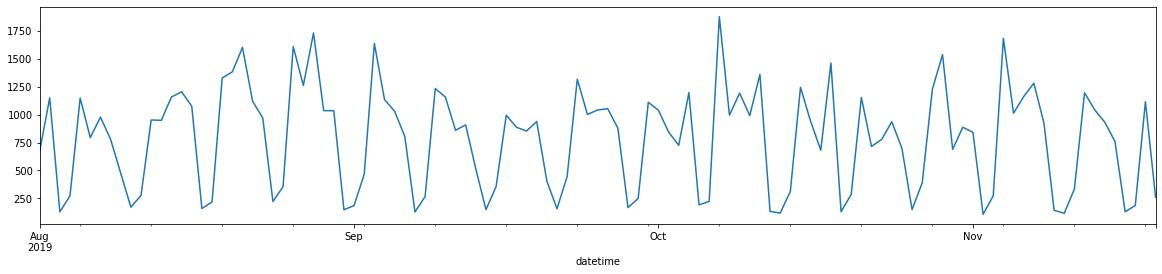

In [25]:
plt.figure(figsize=(20,4))
df['2019-08':].ip.resample('d').count().plot()

In [28]:
profs = log.mystery.unique()

In [58]:
for i in profs:
    print('identifier: ',i)
    print(log[log.id == i].mystery.value_counts())

identifier:  8.0
22.0    483
Name: mystery, dtype: int64
identifier:  22.0
21.0    199
Name: mystery, dtype: int64
identifier:  21.0
16.0    107
Name: mystery, dtype: int64
identifier:  1.0
28.0    2649
8.0     1617
Name: mystery, dtype: int64
identifier:  16.0
21.0    193
Name: mystery, dtype: int64
identifier:  18.0
22.0    1455
Name: mystery, dtype: int64
identifier:  19.0
22.0    1518
Name: mystery, dtype: int64
identifier:  nan
Series([], Name: mystery, dtype: int64)
identifier:  13.0
22.0    79
Name: mystery, dtype: int64
identifier:  14.0
22.0    596
Name: mystery, dtype: int64
identifier:  15.0
21.0    296
Name: mystery, dtype: int64
identifier:  7.0
22.0    1803
Name: mystery, dtype: int64
identifier:  4.0
22.0    692
Name: mystery, dtype: int64
identifier:  12.0
22.0    729
Name: mystery, dtype: int64
identifier:  17.0
21.0    175
Name: mystery, dtype: int64
identifier:  23.0
22.0    969
Name: mystery, dtype: int64
identifier:  2.0
22.0    1541
Name: mystery, dtype: int64
ide

In [51]:
log[log.id == 137].mystery.value_counts()

Series([], Name: mystery, dtype: int64)

In [40]:
log[log.mystery.isna()].id.unique()

array([ 48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88,
        89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 372, 375, 403, 406, 429])

In [102]:
log[log.path.apply(lambda x: '1-fundamentals' in x)&(log.mystery.isna())].id.value_counts()

368    19
349    13
367    11
429    11
353    10
88     10
354     9
351     9
403     9
363     4
361     4
369     3
366     3
372     1
Name: id, dtype: int64

$H_0$: David is 368

In [106]:
log[log.id == 368].tail(15)

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-11-11 19:01:11,2019-11-11,19:01:11,/,368,NaN,173.173.113.51
2019-11-11 19:01:17,2019-11-11,19:01:17,appendix/cli-git-overview,368,NaN,173.173.113.51
2019-11-11 19:01:27,2019-11-11,19:01:27,3-sql/1-mysql-overview,368,NaN,173.173.113.51
2019-11-11 19:04:39,2019-11-11,19:04:39,3-sql/2-mysql-introduction,368,NaN,173.173.113.51
2019-11-11 20:25:11,2019-11-11,20:25:11,3-sql/2-mysql-introduction,368,NaN,173.173.113.51
2019-11-11 20:33:31,2019-11-11,20:33:31,3-sql/1-mysql-overview,368,NaN,173.173.113.51
2019-11-11 20:33:34,2019-11-11,20:33:34,3-sql/2-mysql-introduction,368,NaN,173.173.113.51
2019-11-11 20:36:36,2019-11-11,20:36:36,appendix/cli-git-overview,368,NaN,173.173.113.51
2019-11-11 20:36:43,2019-11-11,20:36:43,3-sql/1-mysql-overview,368,NaN,173.173.113.51


In [107]:
log[log.id == 349].tail(15)

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-10-18 08:21:43,2019-10-18,08:21:43,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,349,NaN,156.80.4.2
2019-10-18 08:22:33,2019-10-18,08:22:33,10-anomaly-detection/3-detecting-timeseries-an...,349,NaN,156.80.4.2
2019-11-14 17:28:51,2019-11-14,17:28:51,/,349,NaN,104.58.132.243
2019-11-19 08:08:14,2019-11-19,08:08:14,/,349,NaN,156.80.4.22
2019-11-19 08:08:49,2019-11-19,08:08:49,5-stats/5-power-analysis,349,NaN,156.80.4.22
2019-11-19 08:11:45,2019-11-19,08:11:45,5-stats/4.2-compare-means,349,NaN,156.80.4.22
2019-11-19 08:12:25,2019-11-19,08:12:25,6-regression/3.0-split-and-scale,349,NaN,156.80.4.22
2019-11-19 08:13:46,2019-11-19,08:13:46,6-regression/4.0-explore,349,NaN,156.80.4.22
2019-11-19 08:13:48,2019-11-19,08:13:48,6-regression/6.0-feature-engineering,349,NaN,156.80.4.22


In [110]:
log[log.id == 367].tail(15)

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-10-03 15:50:49,2019-10-03,15:50:49,/,367,NaN,216.177.165.194
2019-10-16 09:07:49,2019-10-16,09:07:49,/,367,NaN,216.177.165.194
2019-10-17 14:28:51,2019-10-17,14:28:51,/,367,NaN,216.177.165.194
2019-10-20 14:06:01,2019-10-20,14:06:01,/,367,NaN,216.177.165.194
2019-10-21 16:28:04,2019-10-21,16:28:04,/,367,NaN,216.177.165.194
2019-10-29 07:51:32,2019-10-29,07:51:32,/,367,NaN,216.177.165.194
2019-11-05 17:22:27,2019-11-05,17:22:27,/,367,NaN,216.177.165.194
2019-11-07 14:25:24,2019-11-07,14:25:24,/,367,NaN,216.177.165.194
2019-11-07 14:26:24,2019-11-07,14:26:24,6-regression/multivariate-regression-in-excel,367,NaN,216.177.165.194


In [114]:
log[log.id == 429].tail(15)

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-10-14 21:04:34,2019-10-14,21:04:34,/,429,NaN,172.124.70.113
2019-10-14 21:04:39,2019-10-14,21:04:39,/,429,NaN,172.124.70.113
2019-10-14 21:04:40,2019-10-14,21:04:40,html-css,429,NaN,172.124.70.113
2019-10-14 21:04:43,2019-10-14,21:04:43,html-css/introduction,429,NaN,172.124.70.113
2019-10-24 20:17:23,2019-10-24,20:17:23,/,429,NaN,72.181.106.116
2019-10-24 20:18:56,2019-10-24,20:18:56,javascript-i,429,NaN,72.181.106.116
2019-10-24 20:23:00,2019-10-24,20:23:00,jquery,429,NaN,72.181.106.116
2019-10-24 20:23:03,2019-10-24,20:23:03,javascript-i,429,NaN,72.181.106.116
2019-10-24 20:23:05,2019-10-24,20:23:05,javascript-i/bom-and-dom,429,NaN,72.181.106.116


In [116]:
log[log.id == 88].tail(15)

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-11-16 11:30:15,2019-11-16,11:30:15,html-css,88,7.0,136.50.6.131
2019-11-16 11:31:28,2019-11-16,11:31:28,html-css/introduction,88,7.0,136.50.6.131
2019-11-16 11:38:13,2019-11-16,11:38:13,toc,88,7.0,136.50.6.131
2019-11-16 11:38:28,2019-11-16,11:38:28,html-css,88,7.0,136.50.6.131
2019-11-16 11:38:39,2019-11-16,11:38:39,toc,88,7.0,136.50.6.131
2019-11-16 11:38:45,2019-11-16,11:38:45,html-css,88,7.0,136.50.6.131
2019-11-16 11:40:31,2019-11-16,11:40:31,html-css/introduction,88,7.0,136.50.6.131
2019-11-16 11:46:27,2019-11-16,11:46:27,html-css/elements,88,7.0,136.50.6.131
2019-11-16 11:46:51,2019-11-16,11:46:51,html-css/introduction,88,7.0,136.50.6.131


In [133]:
log['2019-08-20 09:00':'2019-08-20 17:00']

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-08-20 09:00:24,2019-08-20,09:00:24,java-iii,171,23.0,97.105.19.58
2019-08-20 09:00:44,2019-08-20,09:00:44,java-iii,419,32.0,97.105.19.58
2019-08-20 09:00:52,2019-08-20,09:00:52,java-iii,424,32.0,97.105.19.58
2019-08-20 09:01:04,2019-08-20,09:01:04,toc,444,33.0,97.105.19.58
2019-08-20 09:01:06,2019-08-20,09:01:06,/,448,33.0,97.105.19.58
2019-08-20 09:01:07,2019-08-20,09:01:07,javascript-i,444,33.0,97.105.19.58
2019-08-20 09:01:43,2019-08-20,09:01:43,javascript-i/mapbox-api,449,33.0,97.105.19.58
2019-08-20 09:02:08,2019-08-20,09:02:08,javascript-i/coffee-project,437,33.0,97.105.19.58
2019-08-20 09:02:21,2019-08-20,09:02:21,javascript-i/coffee-project,451,33.0,97.105.19.58


In [155]:
local_log = log[(log.ip == '97.105.19.58')|(log.ip == '97.105.19.61')].copy()
local_log.shape

(288882, 6)

In [156]:
local_log[local_log.mystery == 34]#['2019-08-19':]

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-08-20 09:39:58,2019-08-20,09:39:58,/,466,34.0,97.105.19.58
2019-08-20 09:39:59,2019-08-20,09:39:59,/,467,34.0,97.105.19.58
2019-08-20 09:39:59,2019-08-20,09:39:59,/,468,34.0,97.105.19.58
2019-08-20 09:40:02,2019-08-20,09:40:02,/,469,34.0,97.105.19.58
2019-08-20 09:40:08,2019-08-20,09:40:08,/,470,34.0,97.105.19.58
2019-08-20 09:40:15,2019-08-20,09:40:15,/,471,34.0,97.105.19.58
2019-08-20 09:40:15,2019-08-20,09:40:15,/,472,34.0,97.105.19.58
2019-08-20 09:40:17,2019-08-20,09:40:17,/,473,34.0,97.105.19.58
2019-08-20 09:40:18,2019-08-20,09:40:18,/,474,34.0,97.105.19.58


$H_0$: bayes - 34

In [143]:
local_log[local_log.path.apply(lambda x: 'flask' in x)]

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-09-18 14:33:35,2019-09-18,14:33:35,13-advanced-topics/3.4-intro-to-flask,474,34.0,97.105.19.58
2019-09-18 14:34:52,2019-09-18,14:34:52,13-advanced-topics/3.4-intro-to-flask,474,34.0,97.105.19.58
2019-09-19 15:54:54,2019-09-19,15:54:54,13-advanced-topics/3.4-intro-to-flask,474,34.0,97.105.19.58
2019-09-23 09:01:23,2019-09-23,09:01:23,13-advanced-topics/3.4-intro-to-flask,474,34.0,97.105.19.58
2019-09-24 10:12:40,2019-09-24,10:12:40,13-advanced-topics/3.4-intro-to-flask,475,34.0,97.105.19.58
2019-11-06 15:13:32,2019-11-06,15:13:32,13-advanced-topics/3.4-intro-to-flask,11,28.0,97.105.19.58
2019-11-06 15:13:38,2019-11-06,15:13:38,13-advanced-topics/3.4-intro-to-flask,11,28.0,97.105.19.58


$H_0$: I'm 474

In [146]:
log[log.id == 474].ip.value_counts()

97.105.19.58       363
108.174.80.231      50
192.171.117.210      1
Name: ip, dtype: int64

In [147]:
log[log.ip == '192.171.117.210']

,date,time,path,id,mystery,ip
datetime,,,,,,
2018-01-26 12:37:53,2018-01-26,12:37:53,/,37,19.0,192.171.117.210
2018-01-26 12:37:54,2018-01-26,12:37:54,mkdocs/search_index.json,37,19.0,192.171.117.210
2018-01-26 12:38:12,2018-01-26,12:38:12,content/javascript/objects/math.html,37,19.0,192.171.117.210
2018-01-26 12:38:19,2018-01-26,12:38:19,content/laravel/quickstart/sessions.html,37,19.0,192.171.117.210
2018-01-30 12:44:46,2018-01-30,12:44:46,/,69,14.0,192.171.117.210
2018-01-30 12:44:58,2018-01-30,12:44:58,content/git,69,14.0,192.171.117.210
2018-01-30 12:44:58,2018-01-30,12:44:58,content/git/gitbook/images/favicon.ico,69,14.0,192.171.117.210
2018-01-30 12:45:04,2018-01-30,12:45:04,content/php_i,69,14.0,192.171.117.210
2018-01-30 12:45:04,2018-01-30,12:45:04,content/php_i/gitbook/images/favicon.ico,69,14.0,192.171.117.210


In [151]:
local_log[(local_log.mystery != 34)&(local_log.path.apply(lambda x: '1-fundamentals' in x))]

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-07-02 08:52:25,2019-07-02,08:52:25,1-fundamentals/pipeline-demo,1,28.0,97.105.19.58
2019-07-02 09:44:18,2019-07-02,09:44:18,1-fundamentals/1-fundamentals-overview,11,28.0,97.105.19.58
2019-07-02 09:44:21,2019-07-02,09:44:21,1-fundamentals/1-fundamentals-overview,11,28.0,97.105.19.58
2019-07-03 09:20:22,2019-07-03,09:20:22,1-fundamentals/1-fundamentals-overview,11,28.0,97.105.19.58
2019-07-03 09:24:29,2019-07-03,09:24:29,1-fundamentals/1-fundamentals-overview,11,28.0,97.105.19.58
2019-07-03 10:31:37,2019-07-03,10:31:37,1-fundamentals/1-fundamentals-overview,11,28.0,97.105.19.58
2019-07-03 10:31:39,2019-07-03,10:31:39,1-fundamentals/pipeline-demo,11,28.0,97.105.19.58
2019-07-03 10:32:05,2019-07-03,10:32:05,1-fundamentals/1-fundamentals-overview,11,28.0,97.105.19.58
2019-07-03 12:24:21,2019-07-03,12:24:21,1-fundamentals/1-fundamentals-overview,11,28.0,97.105.19.58


In [154]:
log[(log.id == 1)&(log.mystery == 8)].ip.value_counts()

97.105.19.61      1016
97.105.19.58       338
72.177.226.58      242
172.56.15.15         8
72.177.229.125       4
172.56.15.203        3
97.98.16.4           2
172.56.15.50         2
172.56.15.46         1
172.56.15.6          1
Name: ip, dtype: int64

In [176]:
log[(log.id == 11)&(log.path.apply(lambda x: 'java' in x))]['2019-08-19':]

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-08-22 00:49:18,2019-08-22,00:49:18,javascript-ii,11,28.0,76.185.131.226
2019-08-23 09:44:15,2019-08-23,09:44:15,javascript-ii,11,28.0,97.105.19.58
2019-08-23 09:44:16,2019-08-23,09:44:16,java-i,11,28.0,97.105.19.58
2019-08-23 09:44:18,2019-08-23,09:44:18,java-ii,11,28.0,97.105.19.58
2019-09-17 09:11:15,2019-09-17,09:11:15,java-ii/junit-tdd,11,28.0,97.105.19.58
2019-09-17 09:12:01,2019-09-17,09:12:01,java-ii/deployment-and-dependencies,11,28.0,97.105.19.58
2019-10-02 12:27:45,2019-10-02,12:27:45,java-ii/collections,11,28.0,97.105.19.58
2019-10-02 12:28:25,2019-10-02,12:28:25,java-ii/collections,11,28.0,97.105.19.58
2019-10-03 09:44:15,2019-10-03,09:44:15,java-ii/collections,11,28.0,97.105.19.58


In [175]:
log[(log.id == 1)&(log.path.apply(lambda x: 'java' in x))]['2019-08-19':]

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-08-21 14:23:06,2019-08-21,14:23:06,java-iii,1,28.0,97.105.19.58
2019-08-21 14:23:09,2019-08-21,14:23:09,java-iii/sessions-and-cookies,1,28.0,97.105.19.58
2019-08-21 14:23:34,2019-08-21,14:23:34,java-iii/mvc,1,28.0,97.105.19.58
2019-08-26 13:12:55,2019-08-26,13:12:55,java-ii/interfaces-and-abstract-classes,1,28.0,97.105.19.58
2019-09-23 12:17:33,2019-09-23,12:17:33,javascript-i,1,28.0,97.105.19.58
2019-09-23 12:17:35,2019-09-23,12:17:35,javascript-ii,1,28.0,97.105.19.58
2019-09-23 12:17:37,2019-09-23,12:17:37,javascript-ii/es6,1,28.0,97.105.19.58
2019-09-23 12:17:44,2019-09-23,12:17:44,javascript-i,1,28.0,97.105.19.58
2019-09-23 12:17:51,2019-09-23,12:17:51,javascript-i/introduction/working-with-data-ty...,1,28.0,97.105.19.58


In [171]:
log[(log.id == 404)&(log.path.apply(lambda x: 'java' in x))]

,date,time,path,id,mystery,ip
datetime,,,,,,
2019-07-08 11:43:12,2019-07-08,11:43:12,javascript-i/google-maps-api,404,28.0,97.105.19.58


In [199]:
log[(log.ip == '97.105.19.61')&(log.path.apply(lambda x: 'capstone' in x))]

,date,time,path,id,mystery,ip
datetime,,,,,,
2018-01-26 10:35:36,2018-01-26,10:35:36,appendix/capstone-workbook,15,21.0,97.105.19.61
2018-01-26 11:12:04,2018-01-26,11:12:04,appendix/capstone-workbook,10,21.0,97.105.19.61
2018-01-26 11:12:07,2018-01-26,11:12:07,appendix/capstone-workbook,22,21.0,97.105.19.61
2018-01-26 11:24:29,2018-01-26,11:24:29,appendix/capstone-workbook,24,21.0,97.105.19.61
2018-01-26 11:36:38,2018-01-26,11:36:38,appendix/capstone-workbook,16,21.0,97.105.19.61
2018-01-26 11:47:01,2018-01-26,11:47:01,appendix/capstone-workbook,11,1.0,97.105.19.61
2018-01-26 11:48:23,2018-01-26,11:48:23,appendix/capstone-workbook,16,21.0,97.105.19.61
2018-01-26 11:49:11,2018-01-26,11:49:11,appendix/capstone-workbook,33,21.0,97.105.19.61
2018-01-26 13:35:56,2018-01-26,13:35:56,appendix/capstone-workbook,31,22.0,97.105.19.61


In [210]:
log[log.id == 11].groupby(log[log.id == 11].index.hour).count()

,date,time,path,id,mystery,ip
datetime,,,,,,
0,19,19,19,19,19,19
1,11,11,11,11,11,11
2,9,9,9,9,9,9
3,13,13,13,13,13,13
4,11,11,11,11,11,11
5,2,2,2,2,2,2
6,11,11,11,11,11,11
7,24,24,24,24,24,24
8,233,233,233,233,233,233


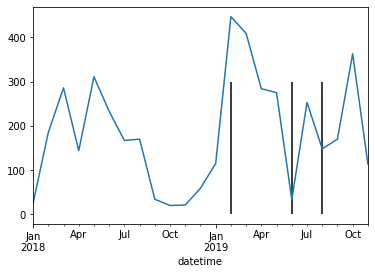

In [216]:
log[log.id == 1].resample('m').ip.count().plot()
plt.vlines('2019-02', 0, 300)
plt.vlines('2019-06', 0,300)
plt.vlines('2019-08-19',0,300)

In [209]:
log[log.mystery == 28].id.value_counts()

11     5269
64     4241
1      2649
248    1767
404    1640
211    1560
428    1065
314     704
37      374
146     373
53      321
397     305
312     131
514      96
40       66
370      54
257      34
539      27
461       1
Name: id, dtype: int64

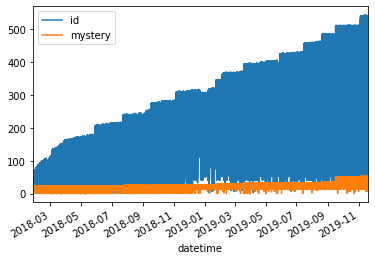

In [218]:
log[log.mystery != 28]